In [1]:
# Install the library from GitHub
# !pip install -e git+https://github.com/sebastian-sosa/interpretability_lib.git#egg=interpretability_lib
!rm -rf interpretability_lib
!git clone https://github.com/sebastian-sosa/interpretability_lib.git
!touch __init__.py

Cloning into 'interpretability_lib'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 65 (delta 27), reused 52 (delta 14), pack-reused 0
Receiving objects: 100% (65/65), 1.08 MiB | 7.16 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [14]:
from io import BytesIO

import requests
import numpy as np
import torchvision.transforms as transforms
from PIL import Image

from interpretability_lib.interpretability_lib import (
    interpretability,
    model_loader,
    visualization,
)

In [4]:
# Load the image
IMG_URL = 'https://minifairytailgoldenretrievers.com/uploads/photos/54C2B437-664B-4729-AF5D-15A68273B79F.jpeg'
response = requests.get(IMG_URL)
image = Image.open(BytesIO(response.content))

In [ ]:
model = model_loader.load_vgg16()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
reverse_transform = transforms.Compose([
    transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225]),
])

input_image = transform(image).unsqueeze(0)

# Compute the saliency map
saliency_map = interpretability.compute_saliency_map(input_image, model)

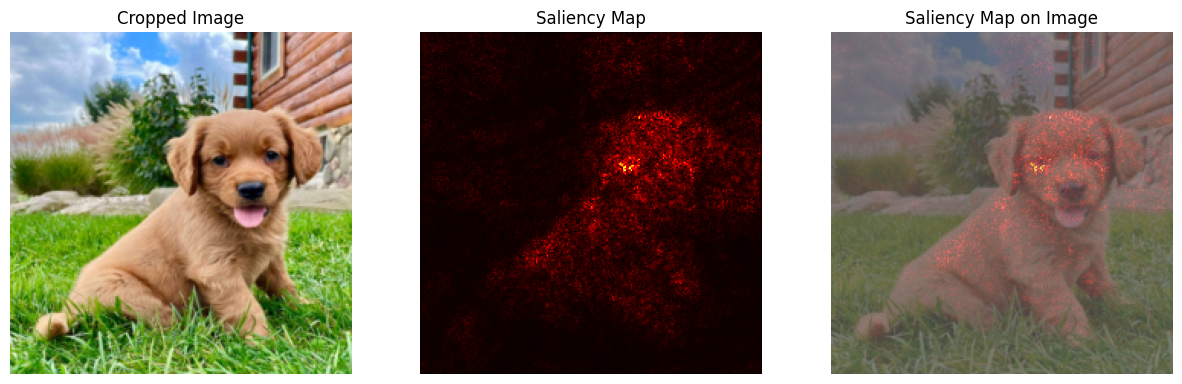

In [15]:
visualization.display_saliency_map(
    np.transpose(reverse_transform(input_image.squeeze(0)), (1, 2, 0)),
    saliency_map
)